In [1]:
import numpy as np
import pandas as pd

In [2]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/skku/2021-1 Machine Learning/ml project/train.csv")

In [4]:
df.head()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,24.365636,0.175620,21.451660,23.824941,26.860989,5.409329,178.302275,118.805772,71.780979,60.595704,1.120236,0.456544,0.679286,1.030189,1.554274,0.874988,11.056342,5.862386,7.338043,4.313646,0.626464,0.695773,21.477432,0.693588,-0.327011,2.948707,2.301753,0.621157,-0.636670,1.357991,0.041140,1.294767,1.411157,...,0.013287,1553.790611,13.057997,17276.461014,0.000760,15273.899997,0.010718,1454.616107,0.333077,11.872866,0.153309,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.082971,0.056775,38.786267,0.067508,39.441458,166082.362816,76.087625,93.992936,77.820486,36532.756730,19.835802,40.867942,0.001236,0.000041,0.073747,3.247842,1.524696,0.038395,0.007741,0.009176,0.002994,17.493596,0
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,20.450413,0.180559,17.321590,20.874958,23.396257,6.074668,137.679613,87.802155,67.882583,52.059239,0.622723,0.416345,0.396978,0.559901,0.836382,0.439405,4.619568,2.419374,2.571888,1.489682,0.307432,0.502883,25.386675,0.305130,2.699263,1.668620,4.992532,1.532773,3.519948,2.028082,0.065575,1.384110,1.419527,...,0.005533,491.589328,0.276725,20300.495507,0.000696,10802.614674,0.008120,445.160892,0.125321,4.298156,0.011688,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.012751,0.033280,24.012308,0.017846,21.320284,928.943139,41.933796,520.846650,41.720618,388.881196,15.238695,47.110117,0.000494,0.000053,

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 383)
(41, 383)
(364, 1)
(41, 1)


In [8]:
X_train

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_amean_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
317,0.218785,0.001028,0.079813,0.090654,0.287850,0.015140,0.304579,26.582518,0.186082,22.865634,27.023909,30.000425,7.134790,100.132817,51.957592,65.896000,37.747284,1.616866,0.516545,0.906493,1.466116,2.299053,1.392561,15.358790,7.919510,9.244207,4.964023,1.129706,0.680569,26.517268,0.418172,-4.376531,4.866325,19.829428,1.025733,-6.863017,-13.499918,0.040045,1.476725,1.253475,...,31910.648658,0.028014,1363.109148,0.582481,66790.902804,0.000600,31277.501643,0.016154,1370.309635,0.873823,11.628144,0.123710,18.030130,0.027225,0.000829,3.139616,0.000061,0.361127,0.212985,0.055955,39.227987,0.024625,42.209008,352.018322,110.474102,13.822053,72.292389,12.872958,32.890448,58.751251,0.000672,0.000142,0.216670,2.704176,0.980221,0.080308,0.013798,0.017982,0.002390,26.167064
140,0.088712,0.000548,0.078466,0.375726,0.153425,0.061753,0.240301,29.855348,0.240292,24.293076,30.553524,35.331203,11.038127,248.170664,171.260124,126.198083,106.611772,1.840411,0.435447,1.149587,1.689876,2.497850,1.348262,17.345014,9.455461,10.917157,6.949300,1.628443,0.631444,24.492850,0.759539,-6.716582,-21.065734,13.203935,2.058892,-5.022729,-1.318724,0.068155,1.470821,1.343524,...,23006.992013,0.013818,652.326947,2.033360,28925.125929,0.000615,27112.335226,0.014983,623.602821,4.027540,43.872381,12.995133,46.622316,0.052983,0.001398,7688.076284,0.000096,33.537700,1.115253,0.060498,56.357903,8.789576,274.055268,259.410997,82.479689,3695.069239,1

In [ ]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1
 1 0 0 0]


In [ ]:
print(classification_report(y_test.to_numpy().ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.64      0.53      0.58        17

    accuracy                           0.68        41
   macro avg       0.67      0.66      0.66        41
weighted avg       0.68      0.68      0.68        41



In [ ]:
xgb_model = XGBClassifier()

params = {'n_estimators':[100,150,200],
          'max_depth':[3,4,5,6,7],
          'min_child_weight':[1,2,3],
          'learning_rate':[0.05,0.1,0.15,0.2],
          'subsample':[0.75,1]
          }
          
cv=KFold(n_splits=6, random_state=1)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=cv)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     ran..._alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
         

In [ ]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.75}
0.8325136612021858


In [ ]:
xgb_model = gridcv.best_estimator_
y_pred = xgb_model.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 0 0]


In [ ]:
print(classification_report(y_test.to_numpy().ravel(), y_pred)) #5, 3, 300, 0.1 --> 82.7

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.69      0.65      0.67        17

    accuracy                           0.73        41
   macro avg       0.72      0.72      0.72        41
weighted avg       0.73      0.73      0.73        41



In [ ]:
n_estimators = [100,150,200]
max_depth = [3,4,5,6,7]
min_child_weight = [1,2,3]
learning_rate = [0.05, 0.1, 0.15, 0.2]
subsample = [0.75,1]

best_score = 0

for n_ in n_estimators:
    for ma in max_depth:
        for mi in min_child_weight:
            for le in learning_rate:
                for su in subsample:

                    xgb_model = XGBClassifier(n_estimators=n_, max_depth=ma, min_child_weight=mi, learning_rate=le, subsample=su)
                    xgb_model.fit(X_train, y_train)
                    y_pred = xgb_model.predict(X_test)
                    score = accuracy_score(y_test.to_numpy().ravel(), y_pred)

                    if score > best_score:
                        best_score = score
                        best_params = [n_, ma, mi, le, su]
                        best_xgb = xgb_model

In [ ]:
print(best_score)
print(best_params)

0.7560975609756098
[100, 3, 2, 0.05, 0.75]


In [ ]:
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

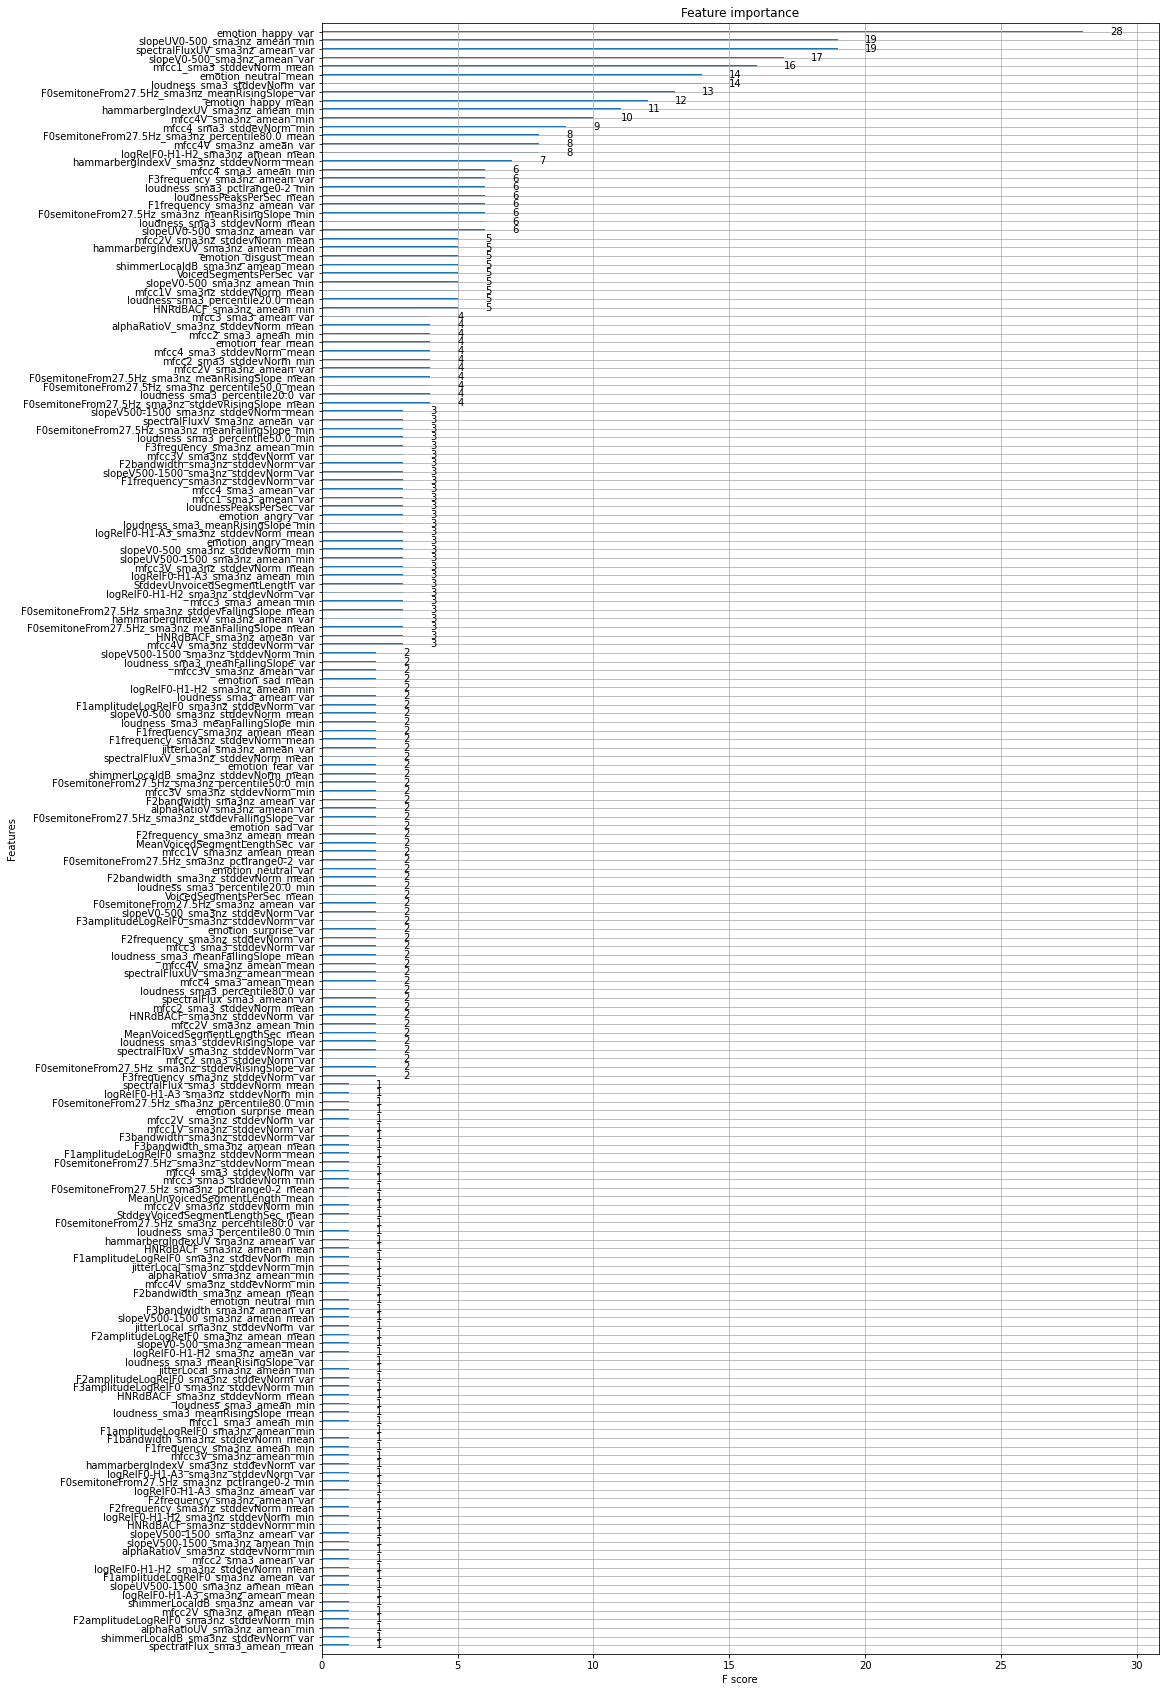

In [ ]:
# features 중요도 시각화
fig, ax = plt.subplots(figsize=(15,30))
plot_importance(best_xgb, ax=ax)

In [ ]:
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test.to_numpy().ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.73      0.65      0.69        17

    accuracy                           0.76        41
   macro avg       0.75      0.74      0.74        41
weighted avg       0.75      0.76      0.75        41



In [ ]:
final = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Machine Learning/ml project/X_test.csv')

In [ ]:
y_pred = best_xgb.predict(final)

In [ ]:
print(y_pred)

[1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1]


In [ ]:
pd.DataFrame(y_pred).to_csv("2019313464.csv", header=None) #2019313464